<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Model calibration and fit for sklearn regressions<span class="tocSkip"></span></h1>

This notebook illustrates how to calibrate and calculate fit for a variety of sklearn regression models:
* sklearn's linear_model family, with and without regularization
* Decision trees: DecisionTreeRegressor 
* Basic ensemble methods: Random Forest and Gradient Boosting

We make use of train-test splits (insample & out-of-sample), and where necessary also cross-validation for purposes of hyperparameter tuning. 

Explicit variable selection is covered in the notebook "sklearn Linear Model Variable Selection". Some models, such as regularized models (LASSO, Elastic Net) and tree-based models have "built-in" feature selection, and are covered in this notebook.

**All sklearn models follow a similar approach:**
1. Instantiate the model class (e.g. LinearRegression, LASSO, RandomForest, etc.) with relevant parameters (e.g. intercept, complexity / regularization penalty)
2. Fit model on the train dataset
3. Apply model on train and test dataset, and explore the model further using e.g. metrics (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) and/or plots such as those provided by the "model diagnostics" template

Some models benefit from hyperparameter tuning as part of step 1.

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-calibration-and-fit-for-sklearn-regressions" data-toc-modified-id="Model-calibration-and-fit-for-sklearn-regressions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model calibration and fit for sklearn regressions</a></span></li><li><span><a href="#Import-key-libraries" data-toc-modified-id="Import-key-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import key libraries</a></span></li><li><span><a href="#Data-import-and-preparation" data-toc-modified-id="Data-import-and-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data import and preparation</a></span><ul class="toc-item"><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train-Test split</a></span><ul class="toc-item"><li><span><a href="#Random-train-test-split" data-toc-modified-id="Random-train-test-split-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Random train-test split</a></span></li><li><span><a href="#Stratified-train-test-split" data-toc-modified-id="Stratified-train-test-split-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Stratified train-test split</a></span></li><li><span><a href="#Random-sample-taken-based-on-a-subject-variable-(e.g.-Customer)" data-toc-modified-id="Random-sample-taken-based-on-a-subject-variable-(e.g.-Customer)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Random sample taken based on a subject variable (e.g. Customer)</a></span></li><li><span><a href="#Time/value-based-splitting" data-toc-modified-id="Time/value-based-splitting-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Time/value based splitting</a></span></li></ul></li><li><span><a href="#Data-transformations" data-toc-modified-id="Data-transformations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data transformations</a></span><ul class="toc-item"><li><span><a href="#Transform-the-train-dataset" data-toc-modified-id="Transform-the-train-dataset-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Transform the train dataset</a></span></li><li><span><a href="#Transform-the-test-dataset" data-toc-modified-id="Transform-the-test-dataset-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Transform the test dataset</a></span></li></ul></li></ul></li><li><span><a href="#Linear-model-calibration" data-toc-modified-id="Linear-model-calibration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear model calibration</a></span><ul class="toc-item"><li><span><a href="#Linear-regression-(OLS)-without-regularization" data-toc-modified-id="Linear-regression-(OLS)-without-regularization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear regression (OLS) without regularization</a></span></li><li><span><a href="#Generalized-Linear-Models" data-toc-modified-id="Generalized-Linear-Models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Generalized Linear Models</a></span><ul class="toc-item"><li><span><a href="#Gamma-regression" data-toc-modified-id="Gamma-regression-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Gamma regression</a></span></li><li><span><a href="#Experimental-GLM-regression" data-toc-modified-id="Experimental-GLM-regression-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Experimental GLM regression</a></span></li></ul></li><li><span><a href="#Quantile-regression" data-toc-modified-id="Quantile-regression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Quantile regression</a></span></li><li><span><a href="#LASSO-regression-with-hyperparameter-tuning-(for-penalty-parameter)" data-toc-modified-id="LASSO-regression-with-hyperparameter-tuning-(for-penalty-parameter)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LASSO regression with hyperparameter tuning (for penalty parameter)</a></span><ul class="toc-item"><li><span><a href="#Lasso-Cross-Validation-for-tuning-alpha-penalty-parameter" data-toc-modified-id="Lasso-Cross-Validation-for-tuning-alpha-penalty-parameter-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Lasso Cross-Validation for tuning alpha penalty parameter</a></span></li><li><span><a href="#Lasso-calibration-for-a-single-alpha-penalty-parameter" data-toc-modified-id="Lasso-calibration-for-a-single-alpha-penalty-parameter-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Lasso calibration for a single alpha penalty parameter</a></span></li><li><span><a href="#Lasso-calibration-for-multiple-alpha-penalty-parameters---TBD" data-toc-modified-id="Lasso-calibration-for-multiple-alpha-penalty-parameters---TBD-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Lasso calibration for multiple alpha penalty parameters - TBD</a></span></li></ul></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Elastic Net</a></span><ul class="toc-item"><li><span><a href="#Elastic-Net-hyperparameter-tuning-of-alpha-and-l1_ratio-parameters" data-toc-modified-id="Elastic-Net-hyperparameter-tuning-of-alpha-and-l1_ratio-parameters-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Elastic Net hyperparameter tuning of alpha and l1_ratio parameters</a></span></li><li><span><a href="#Elastic-Net-calibration-for-a-single-alpha-and-l1_ratio-penalty-parameter-pair" data-toc-modified-id="Elastic-Net-calibration-for-a-single-alpha-and-l1_ratio-penalty-parameter-pair-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Elastic Net calibration for a single alpha and l1_ratio penalty parameter pair</a></span></li></ul></li></ul></li><li><span><a href="#MORE-COMING-SHORTLY" data-toc-modified-id="MORE-COMING-SHORTLY-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MORE COMING SHORTLY</a></span></li></ul></div>

# Import key libraries

In [3]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# Formatting of pandas dataframe
pd.options.display.float_format = '{:,.4f}'.format

In [4]:
# Automatically update custom py scripts that are loaded in
%load_ext autoreload
%autoreload 2

# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.insert(0, "../../utilities")
from resources.ow_colormap import ow_colormap
from regression import sklearn_regression_tools

# Data import and preparation

We will use a dataset for predicting car prices. 

In [5]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
raw_dataset = pd.read_csv("sample_input/car_price_prediction.csv", low_memory=False)
raw_dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,"1,399.0000",LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4/5,Left wheel,Silver,12
1,44731507,16621,"1,018.0000",CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,4/5,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4/5,Right-hand drive,Black,2
3,45769185,3607,862.0000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4/5,Left wheel,White,0
4,45809263,11726,446.0000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4/5,Left wheel,Silver,4


**To keep this notebook focused on model calibration, we remove outliers where price is below 5000 and above 100000**

Refer to data exploration and model exploration templates for more in-depth analysis of the data itself 

In [6]:
dataset = raw_dataset[(raw_dataset['Price'] >= 5000) & (raw_dataset['Price'] <= 100000)].reset_index(drop=True).copy()

## Train-Test split

Regression models identify the relationship between a target variable (also known as dependent variable) and predictive (independent) variables found in the calibration data. 

To flexible and complex models may mis-interpret noise in the data as real signal, and thereby cause the model to overfit to the calibration data. Therefore, it is good practice to understand how the model performs on an 'unseen' portion of the dataset. This type of approach of splitting the data is often called 'train-test' split or in-sample vs. out-of-sample split. The idea is to use the train-sample to select variables and train your model, and review final candidate models on the test-sample to assess model performance. 

If you choose this approach, know that there are many ways to select how to split the data into train and test samples. It is important to keep in mind how the model will be used. 
* If the model is merely a descriptive model of the data you have gathered, then a random train-test split may be relevant
* If your model is used to predict new data, the relationship between the 'new data' and 'current data' should be similar to the relationship between 'test data' and 'train data', so that the model's performance on new data is proxied by the test data. For example:
    * If you are predicting the future of existing subjects (e.g. patients in a hospital), you will want the train-test split to be based on time
    * If you are predicting the outcome of new subjects, you will want the train-test split to be based on subject

**Note: Train-test splitting the data is not the only way to understand if a model is overfitted and its ability to generalize.** 
For example:
* Cross-validation can be a good alternative especially when data is too limited for a train-test split
* Some models have built-in capabilities (e.g. out-of-bag for random forests)

In [7]:
from sklearn.model_selection import train_test_split

y = dataset["Price"]
X = dataset[['Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume',
       'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color', 'Airbags']]

**Below we show a few different ways to split this data**

### Random train-test split

75% train and 25% test dataset, random sampling across all data. The 'random_state' can be set to make it possible to recreate the sampling outcome.

**This is the train-test split we will use in this notebook**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

### Stratified train-test split

Stratified sampling helps ensure the sampling rate to be applied separately to each strata, to improve representativeness to the original (full) dataset.

**Here we stratify based by car Category**

In [9]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.25, stratify=X['Category'], random_state=1000)

pd.DataFrame({"Train": X_train_stratified['Category'].value_counts(), "Test": X_test_stratified['Category'].value_counts()})

,Train,Test
Sedan,4768,1590
Jeep,3070,1023
Hatchback,1603,534
Minivan,450,150
Coupe,322,108
Universal,256,85
Microbus,213,71
Goods wagon,145,48
Pickup,29,10
Cabriolet,22,8


### Random sample taken based on a subject variable (e.g. Customer)

This approach ensures that every observation per subject (e.g. customer) will be in the same sample. Here we need to write our own implementation, for 'Model'. There are many ways to accomplish the sampling -- here we use the simplest: random sampling without replacement. 

In [10]:
subject_variable = "Model"
test_size = 0.25
seed = 1000

# This works when there are no missing values for the subject variable
unique_subjects = X[subject_variable].unique()
N_subjects = len(unique_subjects)
np.random.seed(seed)
train_subject_idx = np.where(np.random.uniform(size = N_subjects) > test_size, 1, 0)
train_subject = unique_subjects[train_subject_idx == 1]

train_idx = X[subject_variable].isin(train_subject)
X_train_subject, y_train_subject = X[train_idx], y[train_idx]
X_test_subject, y_test_subject = X[~train_idx], y[~train_idx]

### Time/value based splitting

The train-test split can be done based on the value of a variable. Most frequently this is done using time, using e.g. using the most recent time-period for test sample for a model to be used to forecast into the future. 

In [11]:
subject_variable = "Prod. year"
threshold = 2010

train_idx = X[subject_variable] <= threshold
X_train_time, y_train_time = X[train_idx], y[train_idx]
X_test_time, y_test_time = X[~train_idx], y[~train_idx]

## Data transformations

Many data transformations can be applied to the dataset before performing the train / test split. However, some transformations are data dependent and have parameters that need to be calibrated (e.g. winsorization, median-imputation, standardization) on the train dataset, to make sure the test dataset remains representative of the data that the model will eventually be used on. 

Here, we will apply the data transformations to the train and then to the test dataset, and for transformations requiring calibration, we will calibrate on train and apply to the test dataset.

To keep this notebook limited to model calibration and fit, we will apply some data transformations upfront, skipping the data exploration steps (separate templates exist for data diagnostics).

Lastly, be careful with how you handle missing values. Many models cannot calibrate on missing data, so either impute the missing values (in some cases, you may want to impute the missing value and then create an indicator for whether the value was originally missing) or remove those rows using dropna. If you drop missing values, make sure your X and y datasets are still aligned. 

### Transform the train dataset

We perform the following transformations:
* Bucket categorical variables to fewer buckets
* Create 0-1 indicator variables based on values or intervals of variables
* Impute missings of certain numerical variables to their median (requires calibration on train dataset)
* Perform a functional transformation (log) on certain numerical variables
* Convert categorical variables to 0-1 indicator variables. Keeping all indicators -- some models must have 1 indicator removed to avoid multicollinearity
* Standardize continuous variables to a min of 0 and max of 1. The min and max used are calibrated on train dataset

In [12]:
# Transform certain columns
X_train['Category_clean'] = np.where(X_train['Category'].isin(['Sedan', 'Jeep', "Hatchback"]), X_train['Category'], "Other")
X_train['Recent'] = np.where(X_train['Prod. year'] > 2012, 1, 0)
X_train['IsLeather'] = np.where(X_train['Leather interior'] == "Yes", 1, 0)
X_train['Automatic'] = np.where(X_train['Gear box type'] == 'Automatic', 1, 0)
X_train['FuelType_clean'] = np.where(X_train['Fuel type'].isin(['Petrol', 'Diesel', "Hybrid"]), X_train['Fuel type'], "Other")
X_train['Cylinders_clean'] = np.where(X_train['Cylinders']<=4, "4 or less", np.where(X_train['Cylinders'] <= 6, "5 or 6", "7 or more"))
X_train['ColorType'] = np.where(X_train['Color'].isin(["Black", "White", "Silver", "Grey", "Blue", "Red"]), "Standard", "Unusual")
X_train['Manufacturer_clean'] = np.where(X_train['Manufacturer'].isin(['HYUNDAI', "TOYOTA", "MERCEDES-BENZ", "FORD", "CHEVROLET", 'BMW', "LEXUS", "HONDA", "NISSAN", "VOLKSWAGEN"]), 
                                                       X_train['Manufacturer'], "Other")
# Median imputations requiring parameters
median_Levy = X_train['Levy'].median()
median_Mileage = X_train['Mileage'].median()

X_train['log_Levy'] = np.log10(X_train['Levy'].fillna(median_Levy))  # Impute and log-transform
X_train['log_Mileage'] = np.log10(1+X_train['Mileage'].fillna(median_Mileage)) # Impute and log-transform

# Retain only relevant vaiables
x_candidates = ['Category_clean', 'Recent', 'IsLeather', "Automatic", 
                "FuelType_clean", "Cylinders_clean", "Manufacturer_clean",
                "ColorType", "log_Levy", "log_Mileage"]
X_train_slim = X_train[x_candidates].copy()

# Some models should have numerical variables that are standardized. Here we standardize using MinMaxScaler (since we already have several 0-1 variables)
# We chose to create separate scalers for each of the two numeric variables that are not already 0-1. It is possible to create a scaler that covers multiple variables as once
from sklearn.preprocessing import MinMaxScaler
scaler_log_Levy = MinMaxScaler().fit(X_train_slim[['log_Levy']])
scaler_log_Mileage = MinMaxScaler().fit(X_train_slim[['log_Mileage']])

X_train_slim['log_Levy_standardized'] = scaler_log_Levy.transform(X_train_slim[['log_Levy']])
X_train_slim['log_Mileage_standardized'] = scaler_log_Mileage.transform(X_train_slim[['log_Mileage']])

# Convert categorical variables to 0-1 indicator variables
categorical_variables = ['Category_clean', "FuelType_clean", "Cylinders_clean", "ColorType", "Manufacturer_clean"]
X_train_num = pd.get_dummies(X_train_slim, dummy_na=False, columns=categorical_variables, drop_first=False)

**Note: We manually imputed the Levy and Mileage variables above before log-transforming them.** But you can use sklearn's SimpleImputer to be calibrated on Train and then applied to both Train and Test samples. 

The syntax for SimpleImputer is here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html, and we make use of it in the data transformation template (download it through Gryphon)

In [13]:
# First few rows of the data
X_train_num.head()

,Recent,IsLeather,Automatic,log_Levy,log_Mileage,log_Levy_standardized,log_Mileage_standardized,Category_clean_Hatchback,Category_clean_Jeep,Category_clean_Other,...,Manufacturer_clean_CHEVROLET,Manufacturer_clean_FORD,Manufacturer_clean_HONDA,Manufacturer_clean_HYUNDAI,Manufacturer_clean_LEXUS,Manufacturer_clean_MERCEDES-BENZ,Manufacturer_clean_NISSAN,Manufacturer_clean_Other,Manufacturer_clean_TOYOTA,Manufacturer_clean_VOLKSWAGEN
2144,0,1,0,2.8915,3.0004,0.4472,0.3215,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12142,0,0,1,2.8915,5.2041,0.4472,0.5577,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4610,1,1,1,2.8837,5.8284,0.4435,0.6246,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1713,0,0,0,2.8915,5.2504,0.4472,0.5626,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12039,0,1,1,2.7657,5.2058,0.3881,0.5578,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Transform the test dataset

Here we need to apply the corresponding transformations on the test data. For transformations that required calibration on the train dataset, we re-use the calibrated values. 

**If we received a new dataset on which to predict, we would apply these transformations**

In [14]:
# Transform certain columns
X_test['Category_clean'] = np.where(X_test['Category'].isin(['Sedan', 'Jeep', "Hatchback"]), X_test['Category'], "Other")
X_test['Recent'] = np.where(X_test['Prod. year'] > 2012, 1, 0)
X_test['IsLeather'] = np.where(X_test['Leather interior'] == "Yes", 1, 0)
X_test['Automatic'] = np.where(X_test['Gear box type'] == 'Automatic', 1, 0)
X_test['FuelType_clean'] = np.where(X_test['Fuel type'].isin(['Petrol', 'Diesel', "Hybrid"]), X_test['Fuel type'], "Other")
X_test['Cylinders_clean'] = np.where(X_test['Cylinders']<=4, "4 or less", np.where(X_test['Cylinders'] <= 6, "5 or 6", "7 or more"))
X_test['ColorType'] = np.where(X_test['Color'].isin(["Black", "White", "Silver", "Grey", "Blue", "Red"]), "Standard", "Unusual")
X_test['Manufacturer_clean'] = np.where(X_test['Manufacturer'].isin(['HYUNDAI', "TOYOTA", "MERCEDES-BENZ", "FORD", "CHEVROLET", 'BMW', "LEXUS", "HONDA", "NISSAN", "VOLKSWAGEN"]), 
                                                       X_test['Manufacturer'], "Other")

# Median imputations -- reuse the medians calculated on train data
X_test['log_Levy'] = np.log10(X_test['Levy'].fillna(median_Levy))  # Impute and log-transform
X_test['log_Mileage'] = np.log10(1+X_test['Mileage'].fillna(median_Mileage)) # Impute and log-transform

# Retain only relevant vaiables
X_test_slim = X_test[x_candidates].copy()

# Re-use the scaling transformation that was calibrated on the train dataset
X_test_slim['log_Levy_standardized'] = scaler_log_Levy.transform(X_test_slim[['log_Levy']])
X_test_slim['log_Mileage_standardized'] = scaler_log_Mileage.transform(X_test_slim[['log_Mileage']])

# Convert categorical variables to 0-1 indicator variables
categorical_variables = ['Category_clean', "FuelType_clean", "Cylinders_clean", "ColorType", "Manufacturer_clean"]
X_test_num = pd.get_dummies(X_test_slim, dummy_na=False, columns=categorical_variables, drop_first=False)

**When converting categorical variables to a set of indicator variables, it is possible that the test dataset doesn't have all the categories that are available in the train dataset**

This is certainly true if you later apply the model to predict a single data point, and often true when you have some infrequent categories (increasing the chances that all are found in the train data). 

So we may need to create additional indicator variables (all with 0 value) for the test dataset to mirror those in the train dataset. This is done, using 'reindex'. 

In [15]:
X_test_num = X_test_num.reindex(columns = X_test_num.columns, fill_value=0)

X_test_num.columns

Index(['Recent', 'IsLeather', 'Automatic', 'log_Levy', 'log_Mileage',
       'log_Levy_standardized', 'log_Mileage_standardized',
       'Category_clean_Hatchback', 'Category_clean_Jeep',
       'Category_clean_Other', 'Category_clean_Sedan', 'FuelType_clean_Diesel',
       'FuelType_clean_Hybrid', 'FuelType_clean_Other',
       'FuelType_clean_Petrol', 'Cylinders_clean_4 or less',
       'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
       'ColorType_Standard', 'ColorType_Unusual', 'Manufacturer_clean_BMW',
       'Manufacturer_clean_CHEVROLET', 'Manufacturer_clean_FORD',
       'Manufacturer_clean_HONDA', 'Manufacturer_clean_HYUNDAI',
       'Manufacturer_clean_LEXUS', 'Manufacturer_clean_MERCEDES-BENZ',
       'Manufacturer_clean_NISSAN', 'Manufacturer_clean_Other',
       'Manufacturer_clean_TOYOTA', 'Manufacturer_clean_VOLKSWAGEN'],
      dtype='object')

# Linear model calibration

This covers calibration and model fit for popular linear models in sklearn, which are found here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Here we will showcase the following:
* LinearRegression (without regularization)
* Generalized Linear Model using the example with GammaRegression (without regularization) 
* Quantile regression for a more outlier robust model
* LASSO regression (with regularization, and with hyperparameter tuning)
* Elastic Net regression (with regularization, and with hyperparameter tuning)

A few tips:

When using regularized models, standardization of the data is recommended to avoid favoring certain variables over others due to their scale. In some cases selective standardization can be used to your favor (e.g. to force in specific variables) when using a regularized regression.

Some feature selection techniques rely on coefficient sizes, causing standardization to matter even for non-regularized regressions (see the sklearn Linear Model Variable Selection notebook). 

Non-regularized models require variables to not be fully multicollinear. 

In [16]:
from sklearn import linear_model, metrics

## Linear regression (OLS) without regularization

The main parameter you need to specify is whether to use an intercept or not. Intercept is almost always used, unless there is reason to believe that when X = 0 that you also have y = 0.

Syntax available here:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

**Start by instantiating the model class**

In [17]:
ols_reg = linear_model.LinearRegression(fit_intercept=True)

**Calibrate the model by fitting on the train dataset for the selected set of variables**

In [18]:
x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               ]

In [19]:
ols_reg_fitted = ols_reg.fit(X_train_num[x_variables], y_train)

**Obtain information about the model, such as coefficients and basic metrics**

In [20]:
# Model coefficients

if ols_reg_fitted.fit_intercept:
    ols_coefs = pd.DataFrame({"Feature": list(ols_reg_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(ols_reg_fitted.coef_) + [ols_reg_fitted.intercept_]})
else:
    ols_coefs = pd.DataFrame({"Feature": ols_reg_fitted.feature_names_in_, "Coef": ols_reg_fitted.coef_})
ols_coefs

,Feature,Coef
0,Recent,"12,083.2232"
1,Automatic,"-3,078.6566"
2,log_Levy,"8,429.3793"
3,log_Mileage,-209.6552
4,Category_clean_Jeep,"11,221.1004"
5,Category_clean_Other,"5,600.3003"
6,Cylinders_clean_5 or 6,"1,594.2380"
7,Cylinders_clean_7 or more,"9,086.2040"
8,Manufacturer_clean_FORD,"-3,080.1257"
9,Manufacturer_clean_HYUNDAI,"1,777.2727"


In [21]:
# Model in-sample prediction and metrics
ols_reg_train_pred = ols_reg.predict(X_train_num[x_variables])
ols_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, ols_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, ols_reg_train_pred), 
               metrics.mean_absolute_error(y_train, ols_reg_train_pred), 
               metrics.mean_squared_error(y_train, ols_reg_train_pred, squared=False)]
}
)

ols_reg_train_metrics

,Metric,Value
0,r2,0.3219
1,MAPE,0.5649
2,MAE,"8,762.5044"
3,RMSE,"12,269.5388"


**Generate out of sample fit, along with metrics**

In [22]:
# Model in-sample prediction and metrics
ols_reg_test_pred = ols_reg.predict(X_test_num[x_variables])
ols_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, ols_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, ols_reg_test_pred), 
               metrics.mean_absolute_error(y_test, ols_reg_test_pred), 
               metrics.mean_squared_error(y_test, ols_reg_test_pred, squared=False)]
}
)

ols_reg_test_metrics

,Metric,Value
0,r2,0.2954
1,MAPE,0.5696
2,MAE,"8,854.2903"
3,RMSE,"12,562.8372"


## Generalized Linear Models

Generalized Linear Models specify a functional link between Y and the linear combination of X, as well as an error distribution. A common link function is the 'log' function, such that log(Y) is predicted through a+bX. 

Read more about GLMs here: https://en.wikipedia.org/wiki/Generalized_linear_model

Here we will use sklearn's GammaRegression, which uses a log-link and a Gamma error distribution (errors expected to be larger for larger y-values). sklearn also provides the following methods:
* Poisson regression, usually when the y-variable represents a count (frequency)
* Tweedie regression, which can represent several types of GLM regression based on a parameter (see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor)

We also have our own implementation of a few GLM regressions that also generate p-values. This code can be extended as needed.

### Gamma regression

We use: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.GammaRegressor.html#sklearn.linear_model.GammaRegressor
with no penalty parameter (alpha = 0) and with intercept (fit_intercept=True). 

If you want to use L1 regularization, the process for selecting an appropriate penalty parameter can be done via cross-validation and is covered in the section on LASSO.

**Instantiate and calibrate model**

In [23]:
gamma_reg = linear_model.GammaRegressor(fit_intercept=True, alpha=0)

x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               ]

gamma_reg_fitted = gamma_reg.fit(X_train_num[x_variables], y_train)

In [24]:
# Model coefficients

if gamma_reg_fitted.fit_intercept:
    gamma_coefs = pd.DataFrame({"Feature": list(gamma_reg_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(gamma_reg_fitted.coef_) + [gamma_reg_fitted.intercept_]})
else:
    gamma_coefs = pd.DataFrame({"Feature": gamma_reg_fitted.feature_names_in_, "Coef": gamma_reg_fitted.coef_})
gamma_coefs

,Feature,Coef
0,Recent,0.5491
1,Automatic,-0.1162
2,log_Levy,0.2263
3,log_Mileage,-0.0018
4,Category_clean_Jeep,0.4671
5,Category_clean_Other,0.2380
6,Cylinders_clean_5 or 6,0.1193
7,Cylinders_clean_7 or more,0.4156
8,Manufacturer_clean_FORD,-0.1263
9,Manufacturer_clean_HYUNDAI,0.0739


**Metrics on training data**

In [25]:
# Model in-sample prediction and metrics
gamma_reg_train_pred = gamma_reg.predict(X_train_num[x_variables])
gamma_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, gamma_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, gamma_reg_train_pred), 
               metrics.mean_absolute_error(y_train, gamma_reg_train_pred), 
               metrics.mean_squared_error(y_train, gamma_reg_train_pred, squared=False)]
}
)

gamma_reg_train_metrics

,Metric,Value
0,r2,0.3436
1,MAPE,0.5402
2,MAE,"8,417.1294"
3,RMSE,"12,071.7911"


**Metrics on testing data**

In [26]:
# Model in-sample prediction and metrics
gamma_reg_test_pred = gamma_reg.predict(X_test_num[x_variables])
gamma_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, gamma_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, gamma_reg_test_pred), 
               metrics.mean_absolute_error(y_test, gamma_reg_test_pred), 
               metrics.mean_squared_error(y_test, gamma_reg_test_pred, squared=False)]
}
)

gamma_reg_test_metrics

,Metric,Value
0,r2,0.3056
1,MAPE,0.5467
2,MAE,"8,565.5784"
3,RMSE,"12,471.5539"


### Experimental GLM regression

In the glm_regression.py file, we have created functionality for calibrating generalized linear models (with p-values). These are estimated using Iteratively ReWeighted Least Squares method, e.g. see: https://towardsdatascience.com/iterated-reweighted-least-squares-and-glms-explained-9c0cc0063526

In [27]:
# Import the module
from regression import glm_regression

In [28]:
glm_summary, _, _ = glm_regression.fit_glm(
    used_data=pd.concat([X_train_num, y_train],axis=1), 
    y_var = "Price", 
    x_var = x_variables, 
    family = glm_regression.LogGaussian(), 
    weight = None, 
    tolerance = 0.001, 
    max_iter = 100,
    show_iter = False)

glm_summary

,Vars,coef,std-err,t-stat,p-val
0,Intercept,8.5158,0.1170,72.8011,0.0000
1,Recent,0.6083,0.0120,50.6158,0.0000
2,Automatic,-0.2007,0.0119,-16.9116,0.0000
3,log_Levy,0.3629,0.0392,9.2526,0.0000
4,log_Mileage,-0.0076,0.0058,-1.3051,0.1919
5,Category_clean_Jeep,0.5295,0.0118,44.7479,0.0000
6,Category_clean_Other,0.3397,0.0166,20.4150,0.0000
7,Cylinders_clean_5 or 6,0.0744,0.0155,4.7884,0.0000
8,Cylinders_clean_7 or more,0.3090,0.0206,15.0287,0.0000
9,Manufacturer_clean_FORD,-0.1087,0.0251,-4.3348,0.0000


**The coefficients above should be used to generate the prediction**

## Quantile regression

Quantile regression generates prediction for a quantile (e.g. median, 25th quantile, 75th quantile etc.) of the target variable. As you are likely well aware, the median is much less sensitive to outliers than the average. The other regressions covered here predict the Conditional Average (i.e. E[y|X]), whereas the median regressor would predict the Conditional Median.

As with the GammaRegressor, the QuantileRegressor also allows for an L1 penalty parameter. Here we will set the penalty to 0. For more information about calibrating the penalty, see the LASSO section.

Syntax information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html

**Instantiate and fit the model**

quantile = 0.5 yields the median prediction. 

sklearn's implementation of quantile regression can be slow for larger datasets. For larger datasets, it is recommended to use libraries other than sklearn (e.g. statsmodels quantReg). In our example, 5000 rows is nearly instant, but 10K rows takes forever.

In [30]:
import random

quantile_reg = linear_model.QuantileRegressor(fit_intercept=True, quantile=0.5, alpha=0, solver="highs")
N = 5000 # Number of rows

x_variables = ['Recent', 'Automatic', 'log_Levy', 'log_Mileage', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               ]
sample_rows = random.sample(X_train_num.index.tolist(), N)
quantile_reg_fitted = quantile_reg.fit(X_train_num.loc[sample_rows,x_variables], y_train[sample_rows])

In [31]:
# Model coefficients

if quantile_reg_fitted.fit_intercept:
    quantile_coefs = pd.DataFrame({"Feature": list(quantile_reg_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(quantile_reg_fitted.coef_) + [quantile_reg_fitted.intercept_]})
else:
    quantile_coefs = pd.DataFrame({"Feature": quantile_reg_fitted.feature_names_in_, "Coef": quantile_reg_fitted.coef_})
quantile_coefs

,Feature,Coef
0,Recent,"8,630.5696"
1,Automatic,"-1,126.9804"
2,log_Levy,"1,362.2358"
3,log_Mileage,486.3858
4,Category_clean_Jeep,"10,158.9626"
5,Category_clean_Other,"3,707.0813"
6,Cylinders_clean_5 or 6,679.4272
7,Cylinders_clean_7 or more,"10,419.7604"
8,Manufacturer_clean_FORD,"-1,016.7715"
9,Manufacturer_clean_HYUNDAI,"2,912.4445"


**Metrics on training data**

Note that we are now comparing a quantile vs. the actual variable. For median, such a comparison is reasonable assuming errors are nearly symmetric, but it would not be reasonable to compare e.g. the 75th quantile.

In [32]:
# Model in-sample prediction and metrics
quantile_reg_train_pred = quantile_reg.predict(X_train_num[x_variables])
quantile_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, quantile_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, quantile_reg_train_pred), 
               metrics.mean_absolute_error(y_train, quantile_reg_train_pred), 
               metrics.mean_squared_error(y_train, quantile_reg_train_pred, squared=False)]
}
)

quantile_reg_train_metrics

,Metric,Value
0,r2,0.2795
1,MAPE,0.4900
2,MAE,"8,501.1968"
3,RMSE,"12,647.6420"


**Metrics on testing data**

In [33]:
# Model in-sample prediction and metrics
quantile_reg_test_pred = quantile_reg.predict(X_test_num[x_variables])
quantile_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, quantile_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, quantile_reg_test_pred), 
               metrics.mean_absolute_error(y_test, quantile_reg_test_pred), 
               metrics.mean_squared_error(y_test, quantile_reg_test_pred, squared=False)]
}
)

quantile_reg_test_metrics

,Metric,Value
0,r2,0.2455
1,MAPE,0.4993
2,MAE,"8,666.5496"
3,RMSE,"13,000.5766"


## LASSO regression with hyperparameter tuning (for penalty parameter)

LASSO regression is a linear regression with a penalty added to the usual Least Squares error term. This penalty is a L1 penalty, i.e. 'sum of absolute value of the coefficients'.

L2 penalty is the 'sum of squared coefficients', and would result in a so-called Ridge Regression (not covered here since approach is very similar to L1 penalty. The key difference is that all variables are kept in a Ridge Regression, while some variables start getting 0 coefficient in a LASSO).

L1 and L2 penalties includes both of the above, and would result in an Elastic Net regression, which is covered in the next section.

**We will first do hyperparameter tuning to find suitable values of the penalty parameter 'alpha'.** This is done by using cross-validation on the train dataset, comparing the outcomes of multiple choices of 'alpha.
* We use LassoCV for that cross-validation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
* Once the alpha parameter has been selected, we use the regular Lasso method: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

**We also use the standardized data here, since penalties are based on coefficient size**

We can also consider more models, as the introduction of penalty makes the model more robust against correlations between x-variables, and it also helps filter out less relevant variables automatically.

### Lasso Cross-Validation for tuning alpha penalty parameter

In [88]:
# Let LassoCV consider 100 different alpha values (you can also specify manual list of alpha values to consider if the ones selected automatically are poor)
Lasso_CV_model = linear_model.LassoCV(eps=0.0001, n_alphas=100, alphas=None, 
                                              fit_intercept=True, 
                                              cv=5, verbose=0, random_state=1000)

x_variables = ['Recent', 'Automatic', 'log_Levy_standardized', 'log_Mileage_standardized', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'ColorType_Standard', 'ColorType_Unusual',
               'FuelType_clean_Hybrid', 'FuelType_clean_Other',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 
               'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               ]

Lasso_CV_outcomes = Lasso_CV_model.fit(X_train_num[x_variables], y_train)

**We can now plot the RMSE vs. the alpha values**

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Alpha,"2,781.7726","2,534.6476","2,309.4765","2,104.3090","1,917.3680","1,747.0343","1,591.8326","1,450.4185","1,321.5674","1,204.1630",...,0.6426,0.5855,0.5335,0.4861,0.4429,0.4036,0.3677,0.3351,0.3053,0.2782
Mean RMSE,"14,885.4852","14,725.3896","14,575.6286","14,380.9144","14,152.0044","13,959.1123","13,796.9256","13,660.8165","13,546.7810","13,451.3757",...,"12,047.1564","12,047.1639","12,047.1709","12,047.1774","12,047.1833","12,047.1888","12,047.1939","12,047.1985","12,047.2028","12,047.2068"


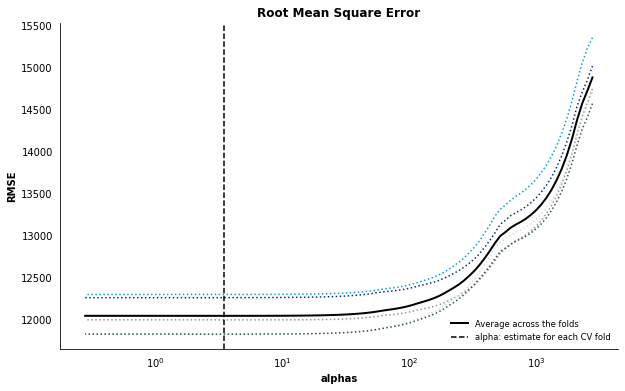

In [89]:
ax, table = sklearn_regression_tools.plot_LassoCV_path(Lasso_CV_outcomes);
table.T

Note: Alternative methods to LassoCV are covered here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and using the more general GridSearchCV approach: https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html

**We can then select one or multiple alpha values to calibrate the LASSO model**

Lasso_CV also selects the best alpha value based on cross-validation. Though it is often advisable to review similarly performing models that may be more intuitive without sacrificing model fit.

In [90]:
# Best alpha value selected by cross-validation
Lasso_CV_outcomes.alpha_

3.4294993020992246

### Lasso calibration for a single alpha penalty parameter

In [91]:
# Let LassoCV consider 100 different alpha values (you can also specify manual list of alpha values to consider if the ones selected automatically are poor)
Lasso_model = linear_model.Lasso(alpha=3.43, fit_intercept=True)
Lasso_model_fitted = Lasso_model.fit(X_train_num[x_variables], y_train)

In [92]:
# Model coefficients
if Lasso_model_fitted.fit_intercept:
    model_coefs = pd.DataFrame({"Feature": list(Lasso_model_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(Lasso_model_fitted.coef_) + [Lasso_model_fitted.intercept_]})
else:
    model_coefs = pd.DataFrame({"Feature": Lasso_model_fitted.feature_names_in_, "Coef": Lasso_model_fitted.coef_})
model_coefs

,Feature,Coef
0,Recent,"11,946.7294"
1,Automatic,"-2,937.2317"
2,log_Levy_standardized,"14,684.4467"
3,log_Mileage_standardized,-262.0078
4,Category_clean_Jeep,"10,342.4780"
5,Category_clean_Other,"4,910.8527"
6,Cylinders_clean_5 or 6,"1,887.9209"
7,Cylinders_clean_7 or more,"9,098.9113"
8,ColorType_Standard,"1,869.8822"
9,ColorType_Unusual,-0.0000


**Generate metrics on train and test data** 

In [93]:
# Model in-sample prediction and metrics
lasso_reg_train_pred = Lasso_model.predict(X_train_num[x_variables])
lasso_reg_train_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_train, lasso_reg_train_pred), 
               metrics.mean_absolute_percentage_error(y_train, lasso_reg_train_pred), 
               metrics.mean_absolute_error(y_train, lasso_reg_train_pred), 
               metrics.mean_squared_error(y_train, lasso_reg_train_pred, squared=False)]
}
)

lasso_reg_train_metrics

,Metric,Value
0,r2,0.3482
1,MAPE,0.5437
2,MAE,"8,487.0974"
3,RMSE,"12,029.3644"


In [94]:
# Model in-sample prediction and metrics
lasso_reg_test_pred = Lasso_model.predict(X_test_num[x_variables])
lasso_reg_test_metrics = pd.DataFrame({
    "Metric": ["r2", "MAPE", "MAE", "RMSE"],
    "Value": [metrics.r2_score(y_test, lasso_reg_test_pred), 
               metrics.mean_absolute_percentage_error(y_test, lasso_reg_test_pred), 
               metrics.mean_absolute_error(y_test, lasso_reg_test_pred), 
               metrics.mean_squared_error(y_test, lasso_reg_test_pred, squared=False)]
}
)

lasso_reg_test_metrics

,Metric,Value
0,r2,0.3283
1,MAPE,0.5433
2,MAE,"8,515.4805"
3,RMSE,"12,266.2008"


### Lasso calibration for multiple alpha penalty parameters - TBD

This is often done to check which variables are selected in the LASSO model, as a higher penalty results in fewer variables selected.

This section will come later. For time being, see the use of LASSO for variable selection in the "sklearn regression variable selection notebook"

## Elastic Net

Elastic net uses both L1 and L2 penalties, resulting in two penalty parameters. Some algorithms define the L1 and L2 penalties as two separate parameters, whereas sklearn uses 'alpha' and 'l1_ratio' (between 0 an 1) in the following manner:
* L1 penalty = alpha * l1_ratio
* L2 penalty = 0.5 * alpha * (1 - l1_ratio)

To select alpha and l1_ratio using cross-validation, we consider a 2D grid of alpha and l1_ratio combinations. 

Since these penalties are based on the size of the coefficients, it is recommended to use standardized data. 

### Elastic Net hyperparameter tuning of alpha and l1_ratio parameters

Read more about the syntax here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html

We have to set the potential l1_ratio values manually. There is a choice whether to set alphas automatically (by specifying n_alphas) or setting them manually:
* If alphas are set automatically, the set of alpha values will vary for each l1_ratio, but the L1 penalty will remain the same set
* If alphas are set manually, the same set of alpha valus will be used for each l1_ratio

We need to take this into account when plotting the model error in the grid vs. penalty values. For simplicity, we set the alphas manually in this example

In [150]:
# Let ElasticNetCV consider 100 different alpha values (you can also specify manual list of alpha values to consider if the ones selected automatically are poor) and a set of l1_ratio values
ENet_CV_model = linear_model.ElasticNetCV(eps=0.0001, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
                                          n_alphas=100, alphas=None, 
                                          fit_intercept=True, 
                                          cv=5, verbose=0, random_state=1000)

x_variables = ['Recent', 'Automatic', 'log_Levy_standardized', 'log_Mileage_standardized', 
               'Category_clean_Jeep', 'Category_clean_Other',
               'Cylinders_clean_5 or 6', 'Cylinders_clean_7 or more',
               'ColorType_Standard', 'ColorType_Unusual',
               'FuelType_clean_Hybrid', 'FuelType_clean_Other',
               'Manufacturer_clean_FORD', 'Manufacturer_clean_HYUNDAI', 'Manufacturer_clean_NISSAN', 
               'Manufacturer_clean_VOLKSWAGEN', 'Manufacturer_clean_Other',
               ]

ENet_CV_outcomes = ENet_CV_model.fit(X_train_num[x_variables], y_train)

**We can now plot the RMSE vs. the grid of alpha and l1_ratio values**

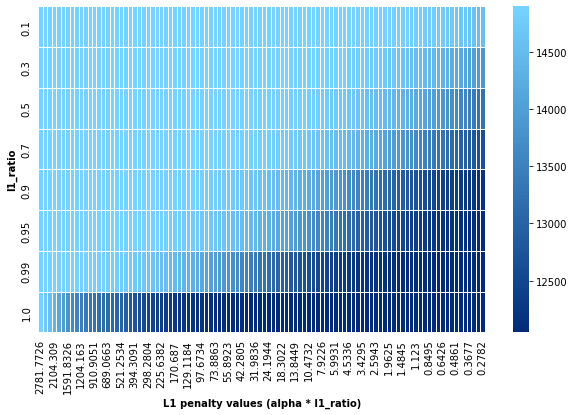

In [163]:
ax, table = sklearn_regression_tools.plot_ElasticNetCV_path(ENet_CV_outcomes, cmap = ow_colormap('blues'));

In [166]:
# Best alpha and l1_ratio values selected by cross-validation
ENet_CV_outcomes.alpha_, ENet_CV_outcomes.l1_ratio_

(3.4294993020992246, 1.0)

### Elastic Net calibration for a single alpha and l1_ratio penalty parameter pair

# MORE COMING SHORTLY